In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("Dataset//kc1.csv")
features_names = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [3]:
x = df.loc[:,features_names].values
y = df.loc[:,["defects"]].values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scale_data = scaler.transform(x)

# PCA Implementation

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(scale_data)
x_PCA = pca.transform(scale_data)


In [21]:
scale_data.shape

(2109, 21)

In [22]:
x_PCA.shape

(2109, 4)

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_PCA[:,0],x_PCA[:,1], c = df['defects'], cmap = "plasma")
plt.xlabel("first pricipal component")
plt.ylabel("second pricipal component")

In [24]:
pca.explained_variance_ratio_

array([0.76161792, 0.05424335, 0.04309015, 0.0372287 ])

In [25]:
import tensorflow as tf
import keras


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [27]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [28]:
# Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)


C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25, random_state=0)

# Class imbalance probelm

Defect 1783
Non Defective 326


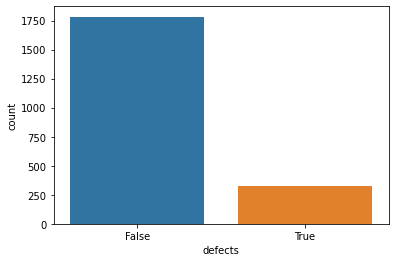

In [31]:
### in order to check the quantity of dataset, we use graphical representation through seaborn library.This will show the 
### quantity of Benign and Malignent in the dataset and also visualize it.
### seaborn is a graphical visualization library. with the help of library, we have to check the quantity of Benign or Malignent
### this will give the quantity of Benign or Malignent
import seaborn as sns
ax = sns.countplot(df['defects'],label= 'Count')
T,F = df['defects'].value_counts()
print('Defect',T)
print('Non Defective',F)

# ANN

In [32]:
# adding the input and first hidden layer.
classifier = Sequential()
classifier.add(Dense(2, activation='relu', kernel_initializer='glorot_uniform',input_dim=4))
#classifier.add(Dense(output_dim=2, init='uniform', activation ='relu', input_dim=2))

#adding the second hidden layer
classifier.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))

#adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [33]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
classifier.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\Faisal\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape [None, 21]


In [ ]:
#predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)